In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pdb

%matplotlib inline

In [16]:
class physobj():
    
    ###dt = 0.001
    
    def __init__(self, loc = [0,0,0], v = [0,0,0], mass = 1):
        self.location = np.array(loc)
        self.mass = mass
        self.velocity = np.array(v)
        
    def applyForce(self, force, dt = 0.01):
        
        force = np.array(force)
        velocity = self.velocity
        mass = self.mass
        
        impulse = force * dt
        
        momentum = velocity * mass
        momentum = momentum + impulse
        velocity = momentum / mass

        self.velocity = velocity
    
    def update(self, dt = 0.01):
        loc = self.location
        v = self.velocity
        
        self.location = loc + (v*dt)

e:\program files\python35\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars


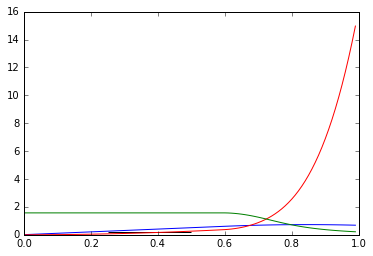

In [64]:
jeremy = physobj()

jeremy.velocity = np.array((0,1,0))


loc = []
for i in range(100):
    #if i > 25 and i < 50:
    #    jeremy.applyForce((0,40,0))
    
    if i > 60:# and i < 75:
        jeremy.applyForce((40,-4,20))
    
    jeremy.update()
    loc.append(jeremy.location)


plt.plot(np.arange(100)*0.01, np.array(loc)[:,1])
#plt.hlines( 0.2, 25*0.01, 50*0.01)
#plt.text(25*0.01, 0.1, '2 N applied to y')

loc = np.array([vector2sphere(l) for l in loc])

plt.plot(np.arange(100)*0.01, np.array(loc)[:,0], 'r')
plt.plot(np.arange(100)*0.01, np.array(loc)[:,1], 'g')
plt.hlines( 0.2, 25*0.01, 50*0.01)
#plt.text(25*0.01, 0.1, '2 N applied to y')

In [65]:
def vector2sphere(vector):
    """
    converts a 3d cartesian vector to a spherical vector
    """
    
    x,y,z = vector
    
      
    R = np.sqrt((x**2) + (y**2) + (z*2))
    theta = np.arctan(y/x)
    phi = np.arcsin(z/R)
    
    sign = x + y + z / abs(x + y + z)
    R = R*sign
    theta = abs(theta)
    phi = abs(phi)   

    return np.array((R, theta, phi))


def sphere2vector(sphere):
    """
    converts a 3d cartesian vector to a spherical vector
    """
    
    R,theta,phi = sphere
      
    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)
    
    return np.array((x, y, z))

<module 'numpy.core.multiarray' from 'e:\\program files\\python35\\lib\\site-packages\\numpy\\core\\multiarray.cp35-win_amd64.pyd'>

### Convert Cartesian to Polar Coordinate system 

$x = r \sin{\theta}$  
$y = r \sin{\theta}$  
$z = r \sin{\theta}$

# Premise

The idea of this game is to stradle between universes with different dimensionalities. The Player object by default inhabits a 4 dimensional world which has 3 spatial dimensions ($x, y, z$) and one time dimension ($t$). Into this world an otherworldy object randomly spawns, which warps the space time around it, causing the spatial deminsion which radiates from it's axis to collapse into the temporal dimension. The effect being that travel is restricted to movement towards the object. When the player approaches the object movement is best defined by polar coordinates.

Force can only be applied such that the radial component is always decreasing.

$\hat{F} = [f_x, f_y, f_z]$  
$f_x =   $

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
x = 0

<slot wrapper '__iter__' of 'list' objects>

### spherical coordinates

$x = r \sin{\theta} \cos{\phi}$  
$y = r \sin{\theta} \sin{\phi}$  
$z = r \cos{\theta}$

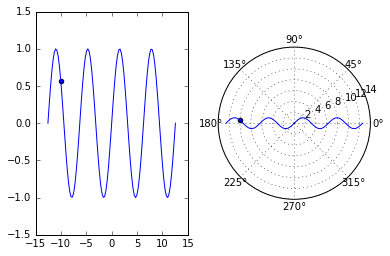

In [211]:
#fig = plt.figure()

#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122, polar = True)


#X = np.linspace(-4*np.pi,4*np.pi, 100)
#Y = np.sin(X)

def cart2polar(X, Y):
    """
    converts an X, Y pair to 
    """

    r =  np.sqrt((X**2) + (Y**2))
    theta = np.arctan(Y/X)
    theta[(X < 0)] = np.pi+ theta[(X < 0)]

    return r, theta

#theta[(X > 0) & (Y < 0)] += 2*np.pi

#ax1.plot(X,Y)
#ax2.plot(theta, r)

#
#ax1.scatter(X[10], Y[10])
#ax2.scatter(theta[10], r[10])

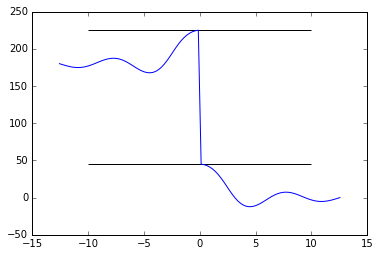

In [208]:
#plt.plot( X, r)
plt.plot( X, np.degrees(theta))
plt.hlines(45,-10,10)
plt.hlines(225,-10,10)
#plt.plot( X, Y)



x = r sin(theta)

r = x / sin(theta)
theta = sin^-1(r/x)

In [ ]:
    var v_max = 2 # max velocity
    
    var impulse = new xy([0,0])
    
    console.log("velocty is " + Ball.v)
    console.log("momentum is " + Ball.p.x + Ball.p.y)
    
    
    # The momentum principle:
    # -----------------------
    # 
    # An object has momentum. Momentum is determined
    # as the mass of the object multiplied by the object's 
    # velocity.
    # 
    # py = vy * mass
    # px = px * mass
    # 
    # Force acts on momentum. The impulse is the force over dt.
    # 
    # p = p + F/dt
    #
    
    var xmlns = "http:#www.w3.org/2000/svg"
    
    # Quest: Find a way to land the traveller in the world
    var traveller = document.createElementNS(xmlns, "circle")      
    
    traveller.setAttributeNS(null,"x",50)
    traveller.setAttributeNS(null,"y",50)
    traveller.setAttributeNS(null,"r",50)
    traveller.setAttributeNS(null,"fill", "black")
    document.documentElement.appendChild(traveller)
    
    # self def is called on page load.

    def drawGameSVG() 

        # Play the game until the player stops.
        gameLoop = setInterval(drawBall, 1)

        # Add keyboard listener.
        window.addEventListener('keydown', whatKey, true)
        
    

    def drawBall() 
        Ball.updatepos(impulse)
        impulse.x = 0
        impulse.y = 0
        
        # Change the player location.
        player.setAttribute("cx", Ball.loc.x)
        player.setAttribute("cy", Ball.loc.y)
    
    # Get key press.
    def whatKey(evt) 

        switch (evt.keyCode) 
            # Left arrow.
            case 37:
            impulse.x = -1
            break
            # Right arrow.
            case 39:
            impulse.x = 1
            break
            #Up arrow
            case 38:
            impulse.y = -1
            break
            #Down arrow
            case 40:
            impulse.y = 1
            break

`np.arccos` is valid over [0, pi]. At theta = pi+x, what does it return?

c:\program files\python35\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


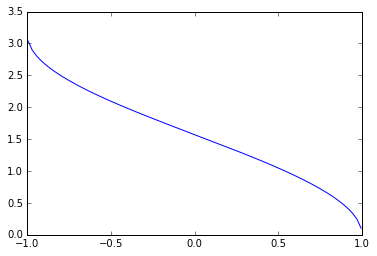

In [23]:
plt.plot(np.linspace(-2*np.pi,2*np.pi,500 ), np.arccos(np.linspace(-2*np.pi,2*np.pi,500 )))

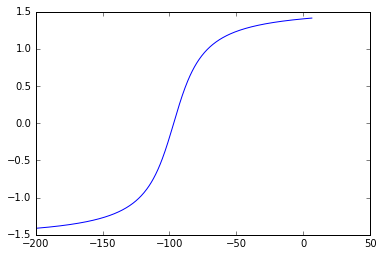

In [29]:
plt.plot(np.linspace(-200,2*np.pi,500 ), np.arctan(np.linspace(-2*np.pi,2*np.pi,500 )))

In [27]:
np.arctan(-10)

-1.4711276743037347

In [32]:
R = 10

phi = np.linspace(-2*np.pi,2*np.pi,500) / np.pi

x = [(R - 0.5) * np.cos(phi) for phi in np.linspace(-2*np.pi,2*np.pi,500)]
y = [(R - 0.5) * np.sin(phi) for phi in np.linspace(-2*np.pi,2*np.pi,500)]
    

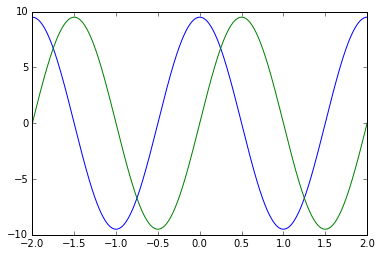

In [34]:
plt.plot(phi, x)
plt.plot(phi, y)